# SHAP for images.

In [1]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 4.8 MB/s eta 0:00:00


In [10]:
import torch, torchvision
from torch import nn
from torchvision import transforms, models, datasets
import shap
import json
import numpy as np
import time
from skimage.transform import resize

import matplotlib.pyplot as plt
from PIL import Image
import torch.nn as nn
import numpy as np
import os, json
import urllib.request


#Read an image
from PIL import Image
import requests
from io import BytesIO


In [3]:
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

model = models.alexnet(pretrained=True).eval()

def normalize(image):
    if image.max() > 1:
        image /= 255
    image = (image - mean) / std
    # in addition, roll the axis so that they suit pytorch
    return torch.tensor(image.swapaxes(-1, 1).swapaxes(2, 3)).float()

The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:03<00:00, 72.2MB/s]


--- 18.039533853530884 seconds ---


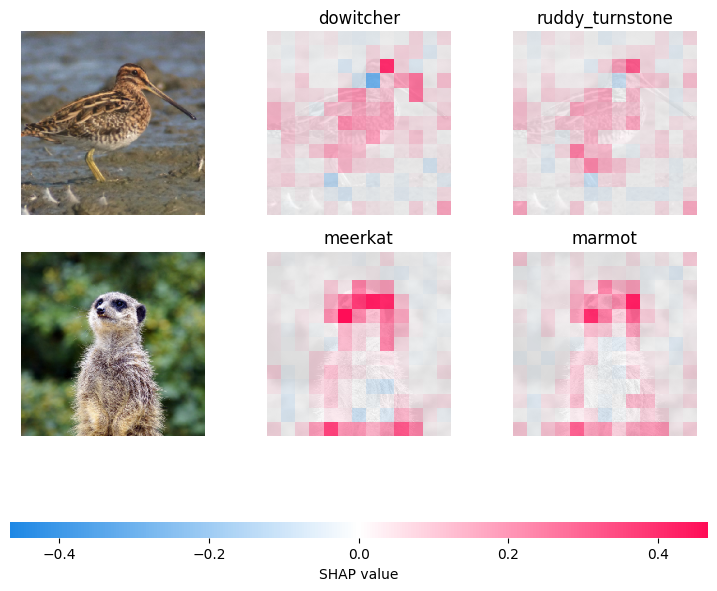

In [4]:
start_time = time.time()
X,y = shap.datasets.imagenet50()

X /= 255

to_explain = X[[39, 41]]

# load the ImageNet class names
url = "https://raw.githubusercontent.com/SalvatoreRa/CNNscan/main/imagenet_class_index.json"
fname = shap.datasets.cache(url)
with open(fname) as f:
    class_names = json.load(f)

e = shap.GradientExplainer((model, model.features[7]), normalize(X))
shap_values,indexes = e.shap_values(normalize(to_explain), ranked_outputs=2, nsamples=20)

# get the names for the classes
index_names = np.vectorize(lambda x: class_names[str(x)][1])(indexes)

# plot the explanations
shap_values = [np.swapaxes(np.swapaxes(s, 2, 3), 1, -1) for s in shap_values]

print("--- %s seconds ---" %(time.time() - start_time))
shap.image_plot(shap_values, to_explain, index_names)

In [5]:
def plot_shap(img, model, Layer_app, size =(512,512), n_samples = 50, ls=0 ):


  def normalize(image):
    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]
    if image.max() > 1:
        image /= 255
    image = (image - mean) / std
    # in addition, roll the axis so that they suit pytorch
    return torch.tensor(image.swapaxes(-1, 1).swapaxes(2, 3)).float()

  #resize the image, normalize, and make it a batch
  im = np.array(img).astype(dtype = np.float32)
  im = resize(im, size)
  im /= 255
  im = np.expand_dims(im, axis=0)
  to_explain = im

  #retrieve the class name of the predictions
  url = "https://raw.githubusercontent.com/SalvatoreRa/CNNscan/main/imagenet_class_index.json"
  fname = shap.datasets.cache(url)
  with open(fname) as f:
      class_names = json.load(f)

  e = shap.GradientExplainer((model, model.features[Layer_app]), normalize(im), local_smoothing=ls)
  shap_values,indexes = e.shap_values(normalize(to_explain), ranked_outputs=2, nsamples=n_samples)

  # get the names for the classes
  index_names = np.vectorize(lambda x: class_names[str(x)][1])(indexes)

  # plot the explanations
  shap_values = [np.swapaxes(np.swapaxes(s, 2, 3), 1, -1) for s in shap_values]
  shap.image_plot(shap_values, to_explain, index_names)


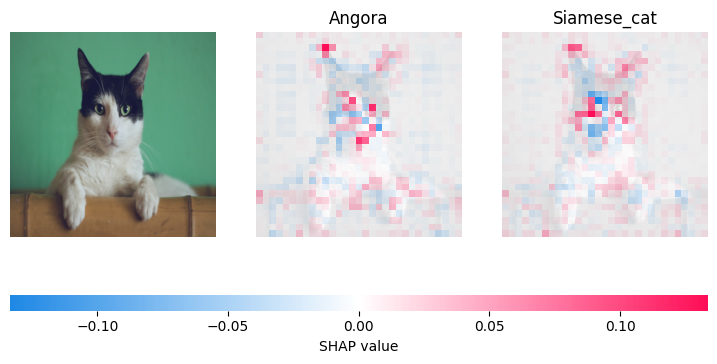

--- 17.504456520080566 seconds ---


In [11]:
url ="https://github.com/SalvatoreRa/CNNscan/blob/main/img/manja-vitolic-gKXKBY-C-Dk-unsplash.jpg?raw=true"
response = requests.get(url)
img = Image.open(BytesIO(response.content))
model  = models.alexnet(pretrained=True)
Layer_app = 7
start_time = time.time()
plot_shap(img, model, Layer_app, size =(512,512), n_samples = 20)
print("--- %s seconds ---" %(time.time() - start_time))